In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [18]:
m = 1000
d = 5
q = 2
active = relu

ratio_train = 0.75

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    # weight = np.concatenate((norm, norm), axis=-1)
    weight = norm
    D = np.diag(1.0/weight**4)
    return D

In [7]:
X = make_X(d, m, dist=sphere)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [8]:
b = np.zeros(d)
b[0] = 1
b[2] = 2
b /= np.linalg.norm(b)
y = np.matmul(X, b) + 0.1
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [9]:
ns = np.arange(10, 500, 10)

# Dense features

## No ensemble

In [10]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[0.0008606188061498835, 0.0004796772637650688, 0.0003234545681074369, 0.0002691977359896956, 0.00026002477269822195, 0.0002891956267787857, 0.0004518326299287921, 0.0004294042174819296, 0.0002661748379273539, 0.00020553790813174875, 0.00018230288023786452, 0.00015301606982700842, 0.00014425852145634937, 0.0001343533955619589, 0.00012153782493557808, 0.00011341582170712129, 0.00011549632363642458, 0.00010314239732626923, 9.978623018601593e-05, 9.792587275004008e-05, 9.527262944894896e-05, 9.204761593502257e-05, 8.84405058131413e-05, 8.713277481600487e-05, 8.528747838139969e-05, 8.13376887709648e-05, 7.934859708435173e-05, 7.838871376644483e-05, 7.461390201677274e-05, 7.557500058228163e-05, 7.327884184578126e-05, 7.206997074413298e-05, 7.015757393821718e-05, 7.068091678576272e-05, 6.993574710974129e-05, 6.675430538190624e-05, 6.757743442590263e-05, 6.224207898011323e-05, 6.226954953969508e-05, 6.217749076573518e-05, 6.251691864449847e-05, 5.7672240502080225e-05, 6.19818552473655e-05, 6.0

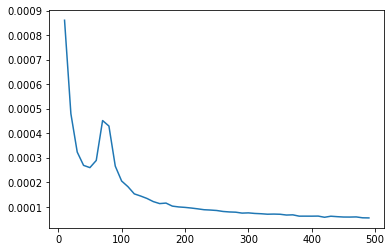

In [11]:
print([np.mean(res) for res in results_l2_dense])
plt.plot(ns, [np.mean(res) for res in results_l2_dense])

In [19]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[0.0007289146164249733, 0.00041295012584228704, 0.0003194913700478808, 0.00029344686996648253, 0.00025596570847104185, 0.0002857479883388878, 0.0004591119935530155, 0.0005442150622788893, 0.0004073287855151873, 0.00032341349936013304, 0.0003076355962171445, 0.0002732764234636349, 0.00026540802459070075, 0.00026266861670119426, 0.0002578923568150735, 0.00023772876525427148, 0.00023847012142686716, 0.0002366810023894822, 0.000230184737829686, 0.0002272334951323882, 0.00021429796610364732, 0.0002207962394628997, 0.00022711658881500687, 0.00021064286120124734, 0.00021612174017238676, 0.00020946843459908803, 0.0001965816286687297, 0.00021285807246244434, 0.00021355019882656503, 0.00020830685460448555, 0.0002078748349517987, 0.00021532530026331016, 0.00019277780028909827, 0.00019362316483493186, 0.00019297981041199296, 0.00020543413044991416, 0.00020557985549953754, 0.0001904423268666724, 0.000200529184155151, 0.00018665482749977532, 0.00019813441288618643, 0.00020117259357586053, 0.00019795

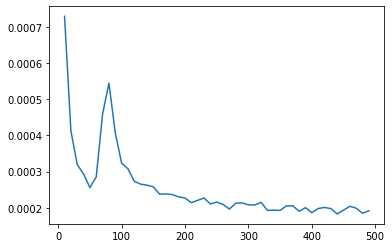

In [20]:
print([np.mean(res) for res in results_wl2_dense])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense])

## Ensemble

In [34]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

[0.00619637729639871, 0.006114435192610035, 0.0060167868718892575, 0.005784245089809621, 0.005897063517584619, 0.005794091688454952, 0.0057413409557934125, 0.005842176462780407, 0.0056095167399502, 0.005639011913168365, 0.005569812547308359, 0.005809070906317352, 0.005789110190000263, 0.005761276566345228, 0.005614205318214297, 0.0057369870830017485, 0.005514904517667845, 0.0057697999281079, 0.005691135823419602, 0.005719976591206177, 0.005715161891333177, 0.0056070250148401255, 0.005731874331686406, 0.0053371615325708225, 0.005582376780941594, 0.005628723824609953, 0.005654955257096372, 0.005715949937502797, 0.005588035503172195, 0.005679216385698691, 0.005547607598067805, 0.005765403777019373, 0.005704208683519273, 0.005653695656968648, 0.005504238670062954, 0.0055808286421814525, 0.0056473287173405785, 0.005666470762823863, 0.00563623594938269, 0.005558864700883149, 0.005543845027571434, 0.0055757352301581175, 0.005755476243371517, 0.005705964359260934, 0.005518139248458062, 0.00562

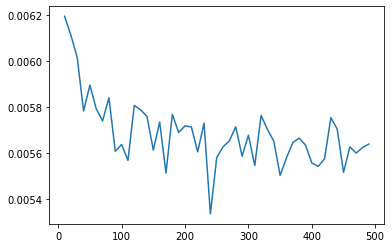

In [35]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_dense_ens])

In [46]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

[0.00601338780732749, 0.005546492410609421, 0.006187101651340199, 0.005703548223356361, 0.005944459954386436, 0.006094109807252238, 0.005728325841541555, 0.005783263522242536, 0.005674006192987159, 0.005838975408627331, 0.0057545574924449385, 0.005796752704128545, 0.005801375158222904, 0.005831638874276267, 0.00561625088770319, 0.005583098222256033, 0.005640232502288385, 0.005880402158254793, 0.0055353230161475035, 0.005613208267374754, 0.005533660491331524, 0.005654947835921657, 0.005631746103056648, 0.005509688732372747, 0.005747190347841966, 0.005740372352623283, 0.005732027070830794, 0.00564724701575529, 0.0056145564151000036, 0.005737024660036177, 0.005720023104631866, 0.005686970996743658, 0.005647085073114782, 0.00572612175288755, 0.005777820306436034, 0.005603847196564026, 0.00559328311168863, 0.005563124352168306, 0.0056995059169689275, 0.005659323336243527, 0.005691305618699014, 0.005659739122126499, 0.005532349167410947, 0.005613856040586127, 0.005687353039128736, 0.00561191

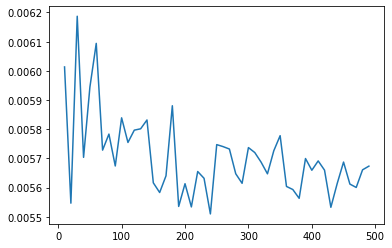

In [47]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense_ens])

# Sparse features

## No ensemble

In [48]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

[0.00022075723721752573, 0.00018578233291331565, 0.00021497839766558574, 0.0010989581011665423, 0.0021293070743068536, 0.07062724219521535, 0.011586678754137747, 0.0011273463171922618, 0.0006544850455697483, 0.0005144700061792299, 0.0004725971292948715, 0.0004314027713932039, 0.0004105836556787757, 0.00039682046753272807, 0.0003868116555347179, 0.0003587117481278182, 0.0003627677993093447, 0.0003600785013872103, 0.00036881332230224247, 0.0003515888291210577, 0.0003537207307572087, 0.00034679406777130684, 0.0003416476050607578, 0.0003432387640221682, 0.0003464216947419376, 0.00034101465019890757, 0.00033322006097094255, 0.00033522837346394057, 0.00034184490998589187, 0.00034021564462114617, 0.00033858974646150603, 0.00033976066315748177, 0.0003403874117051197, 0.0003332001635595933, 0.00033199263021818886, 0.00033212604795452053, 0.00033076720083383815, 0.00033194025679593193, 0.00033736040773984187, 0.00033009758225341037, 0.000330455601600903, 0.0003259313025496385, 0.0003234109562298

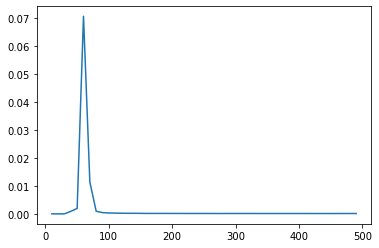

In [49]:
print([np.mean(res) for res in results_l2_sparse])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse])

In [50]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

[0.0002126248703559313, 0.00019298412532133677, 0.0002005791479836578, 0.00022182058918128453, 0.0002473986431596317, 0.0003556051244964121, 0.00038004135354180197, 0.0003253558583657598, 0.0004734861654586764, 0.00044683214191232204, 0.00043096036921793203, 0.0004309268418653981, 0.0005199319011040606, 0.000667216989848659, 0.0004507482719620934, 0.0004910156844150535, 0.00048289589402154137, 0.0004708403472308413, 0.0005327271291996163, 0.0005050208541172054, 0.00044693656434101954, 0.0005024796771819341, 0.00045994222030268275, 0.0007175842853097464, 0.0004887787084989762, 0.0004952756476095736, 0.0004449580739837213, 0.0004463581070616291, 0.0003785578875452598, 0.0005236558863422116, 0.00040619623145313693, 0.00045713342358271147, 0.00035649981059904083, 0.00048392008393446006, 0.00028634704533444605, 0.00044273173053911534, 0.000359768056444517, 0.0003282488008642489, 0.0004369735454966367, 0.0003978485853752738, 0.00044407450092361176, 0.00043181181176031895, 0.00041444297420766

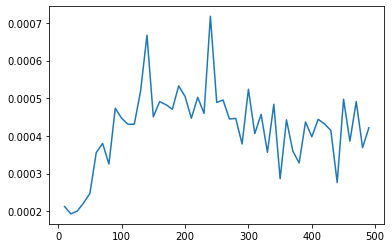

In [51]:
print([np.mean(res) for res in results_wl2_sparse])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse])

## Ensemble

In [52]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

[0.006290064564664274, 0.00576676870609575, 0.005406196836434912, 0.005518357691111234, 0.00541089775465072, 0.0052041538777750015, 0.005324394086373014, 0.005194060703347937, 0.0053062510125356736, 0.005420531215058844, 0.005481132574839969, 0.005529410477356051, 0.005372809360120538, 0.005286996937080627, 0.005261557724087278, 0.005313100818171422, 0.005263593795921974, 0.005357172024844535, 0.005332148824432885, 0.005439335255976134, 0.00556100461598262, 0.005259255847529172, 0.0052827647337553955, 0.0052380607089825984, 0.005359851550359128, 0.005158659561901012, 0.005518732047437919, 0.0052846985708220945, 0.005243004347313134, 0.0051294650846985135, 0.005225627042859867, 0.005296899766088038, 0.00532455757761704, 0.005297196153571476, 0.00525735289532831, 0.005178684359489483, 0.005375516509998462, 0.005187004754206249, 0.005287825603764779, 0.005309074614700586, 0.005245528372032679, 0.0053401917258423, 0.005274646970805605, 0.005177352590054788, 0.005344213541165574, 0.00532705

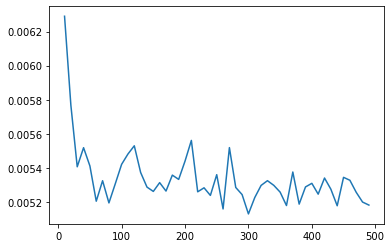

In [53]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [54]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

[0.0052969704854305966, 0.005807286680080063, 0.005675600962157709, 0.005355034556679695, 0.005279841267028421, 0.005486933727441605, 0.005332120599740596, 0.005152583372313467, 0.005182355063692866, 0.005844579850671517, 0.0053216424512662714, 0.005399668572774753, 0.005287108057748159, 0.005223431972678054, 0.005409425323459888, 0.004990656145152099, 0.005366859055193787, 0.005396498356041916, 0.005128486373918601, 0.005230232882055253, 0.005324054484845967, 0.005287388299375179, 0.005222019237145872, 0.005318889303657827, 0.0053138510345377005, 0.0053272860885640065, 0.005489329897607822, 0.005238021434658752, 0.005376254185530503, 0.0053058684156672715, 0.005177252447877412, 0.005323265758697801, 0.005215465599484649, 0.0053989763844572965, 0.005302733981812471, 0.005485535766841839, 0.0052468778958961425, 0.005364378345977833, 0.0052381961940749225, 0.00520404537572986, 0.005383188680006201, 0.005306613960290571, 0.005299121493962005, 0.0051902440815617176, 0.0052628041732492225, 

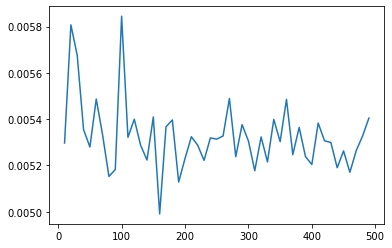

In [55]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse_ens])